In [1]:
import math
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
class Snake:
    """
    Should add in plotting and boundary condition specification methods.
    """

    def __init__(self, B=1, c=1, l=1, sigma=0.1, rho=1, mesh_points=50):
        self.g = -9.8
        self.B = B
        self.c = c
        self.bt = self.B / self.c
        self.sigma = sigma
        self.rho = rho
        self.lg = (-self.B / (self.rho * self.g)) ** (1 / 3)
        self.l = l
        self.x = np.linspace(0, 1, mesh_points)
        self.y = np.zeros((2, self.x.size))
        self.make_initial_guesses()

    def make_initial_guesses(self):
        """
        Initial parameter guesses for usual boundary conditions.
        """
        self.y[0, 0] = np.pi/2
        self.y[0, -1] = 0
        self.y[1, 0] = 0

    def fun_k(self, x, y, p):
        l = p[0]
        dy0_dx = y[1]
        dy1_dx = -(l/self.lg)**3*x*np.cos(y[0])
        dy_dx = np.vstack((dy0_dx, dy1_dx))
        return dy_dx

    def bc(self, ya, yb, p):
        res1 = ya[0]-np.pi/2
        res2 = yb[0]
        res3 = ya[1]
        residuals = np.array([res1, res2, res3])
        return residuals

    def solve(self, verbose=0):
        self.sol = si.solve_bvp(
            fun=self.fun_k, bc=self.bc, x=self.x, y=self.y, p=[self.l], verbose=verbose
        )
        if snake.sol.status != 0:
            print("The answer didn't converge!")
        self.l = self.sol.p[0]
        self.x_pos = si.cumtrapz(self.l * np.cos(self.sol.y[0]), self.sol.x, initial=0)
        self.x_pos -= self.x_pos[-1]
        self.y_pos = si.cumtrapz(self.l * np.sin(self.sol.y[0]), self.sol.x, initial=0)
        self.y_pos -= self.y_pos[-1]

    def cost(self, alpha=0.5):
        height_term = self.y_pos[0] / self.l
        self.height_cost = -alpha * height_term
        work_term = self.c / (2 * self.B) * si.trapz(self.sol.y[1] ** 2, self.sol.x)
        self.work_cost = (1 - alpha) * work_term
        cost = self.height_cost + self.work_cost
        return cost

In [9]:
snake = Snake(c=1000)
snake.solve(verbose=2)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.22e-01       3.23e-17          50             53       
       2          1.59e-01       6.51e-19          103            81       
       3          9.02e-02       2.39e-18          184            99       
       4          4.88e-03       7.59e-19          283            72       
       5          1.05e-04       1.24e-19          355             0       
Solved in 5 iterations, number of nodes 355. 
Maximum relative residual: 1.05e-04 
Maximum boundary residual: 1.24e-19


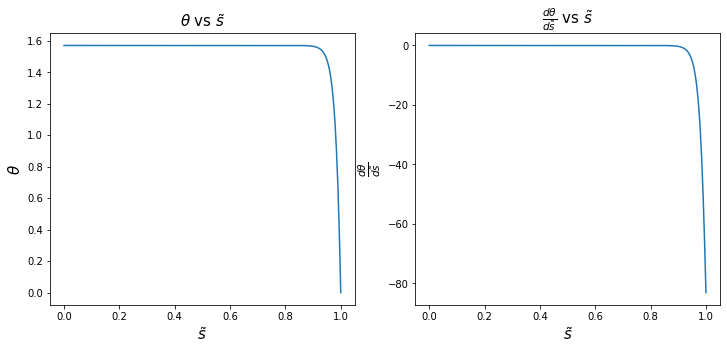

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(snake.sol.x, snake.sol.y[0])
ax[0].set_xlabel(r"$\tilde{s}$", fontsize=15)
ax[0].set_ylabel(r"$\theta$", fontsize=15)
ax[0].set_title(r"$\theta$ vs $\tilde{s}$", fontsize=15)

ax[1].plot(snake.sol.x, snake.sol.y[1])
ax[1].set_xlabel(r"$\tilde{s}$", fontsize=15)
ax[1].set_ylabel(r"$\frac{d\theta}{d\tilde{s}}$", fontsize=15)
ax[1].set_title(r"$\frac{d\theta}{d\tilde{s}}$ vs $\tilde{s}$", fontsize=15)

plt.show()

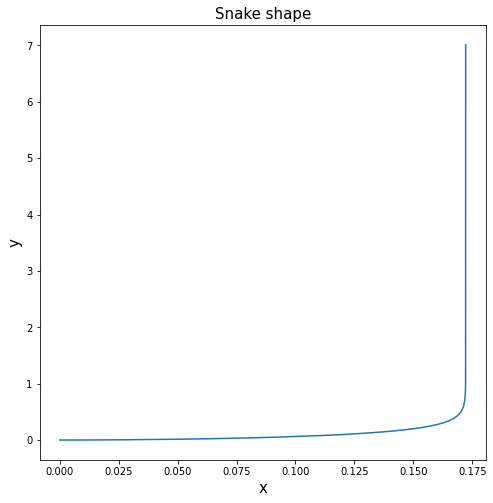

In [11]:
plt.figure(figsize=(8, 8))
plt.plot(-snake.x_pos, -snake.y_pos)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title("Snake shape", fontsize=15)
plt.show()